In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use('ggplot')
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sumedhajauhari/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/sumedhajauhari/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/sumedhajauhari/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sumedhajauhari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df=pd.read_csv("/Users/sumedhajauhari/Desktop/My Study Material/20191226-reviews.csv")
df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [98]:
df=df.head(9000)
df['ID'] = np.arange(len(df))

In [30]:
df['body'].values[0]

"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Recep

In [31]:
print(df.shape)

(9000, 9)


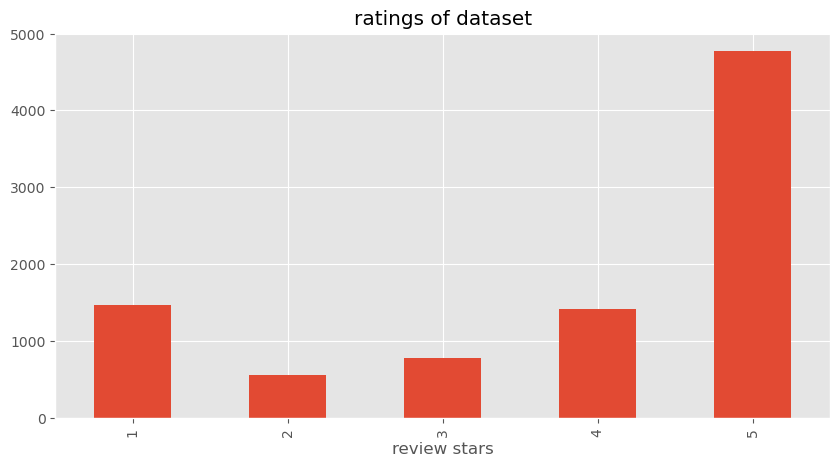

In [32]:
## Represinting ratings
ax=df['rating'].value_counts().sort_index().plot(kind='bar',title='ratings of dataset', figsize=(10,5))
ax.set_xlabel('review stars')
plt.show()

In [36]:
## BASIC NLTK ON SMALL DATA
example=df['body'][50]
print(example)

This is not a "boost" phone and will not work as a GPS with Boost. Had to send it back. A huge pain for something that is $24. This is a rip-off.


In [39]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'not', 'a', '``', 'boost', "''", 'phone', 'and', 'will']

In [44]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('``', '``'),
 ('boost', 'NN'),
 ("''", "''"),
 ('phone', 'NN'),
 ('and', 'CC'),
 ('will', 'MD')]

In [45]:
entity=nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  is/VBZ
  not/RB
  a/DT
  ``/``
  boost/NN
  ''/''
  phone/NN
  and/CC
  will/MD
  not/RB
  work/VB
  as/IN
  a/DT
  (ORGANIZATION GPS/NNP)
  with/IN
  (PERSON Boost/NNP)
  ./.
  Had/NNP
  to/TO
  send/VB
  it/PRP
  back/RB
  ./.
  A/DT
  huge/JJ
  pain/NN
  for/IN
  something/NN
  that/WDT
  is/VBZ
  $/$
  24/CD
  ./.
  This/DT
  is/VBZ
  a/DT
  rip-off/NN
  ./.)


In [ ]:

# Valence Aware Dictionary and sEntiment Reasoner - Bag of word approach
# This uses 'Bag of word' approach :
# 1.Stop words are removed.
# 2.Each word is scored and combined to a total score
# 3.Draw back is that it doesn't account for relationship between words which is the essential part of a language

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sumedhajauhari/nltk_data...


True

In [47]:
sia= SentimentIntensityAnalyzer()

In [48]:
# We can run some examples with our SentimentIntensityAnalyzer object and check polarity scores
sia.polarity_scores('I am ver very happy')

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [49]:
sia.polarity_scores(example)

{'neg': 0.099, 'neu': 0.751, 'pos': 0.15, 'compound': 0.1779}

In [91]:
# Run the polarity score for whole dataset
res={}
for i, row in tqdm(df.iterrows(),total= len(df)):
  body=row['body']
  myid= row['ID']
  #res[myid]=sia.polarity_scores(body)
  # Tokenize the input text
  inputs = tokenizer(body, return_tensors="tf",truncation=True, padding=True, max_length=512)
    # Forward pass through the model
  outputs = model(**inputs)
    # Get the predicted logits
  logits = outputs.logits
  # Apply softmax if needed
  probabilities = tf.nn.softmax(logits, axis=-1)
  res[myid]={'logits': logits.numpy(), 'probabilities': probabilities.numpy()}
    
for myid, result in res.items():
    body = df[df['ID'] == myid]['body'].values[0]
    sentiment_scores = sia.polarity_scores(body)
    result['sentiment_scores'] = sentiment_scores

# Display the results
#for myid, result in res.items():
    #print(f"ID: {myid}")
    #print("Probabilities:", result['probabilities'])
    #print("Sentiment Scores:", result['sentiment_scores'])
    #print()

  0%|          | 0/9000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [94]:
# Run the polarity score for whole dataset (this is very fast it computes in seconds as compared to above code)
res={}
for i, row in tqdm(df.iterrows(),total= len(df)):
  body=row['body']
  myid= row['ID']
  res[myid]=sia.polarity_scores(body)

  0%|          | 0/9000 [00:00<?, ?it/s]

In [95]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=vaders.merge(df,how='left')

In [96]:
# Now we have sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,asin,name,rating,date,verified,title,body,helpfulVotes,tokens
0,0,0.080,0.816,0.105,0.8629,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"[I, had, the, Samsung, A600, for, awhile, whic..."
1,1,0.020,0.876,0.104,0.8860,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,"[Due, to, a, software, issue, between, Nokia, ..."
2,2,0.051,0.846,0.103,0.7992,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,"[This, is, a, great, ,, reliable, phone, ., I,..."
3,3,0.000,0.844,0.156,0.9592,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"[I, love, the, phone, and, all, ,, because, I,..."
4,4,0.066,0.814,0.121,0.7745,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"[The, phone, has, been, great, for, every, pur..."


In [53]:
## Plot VADER results

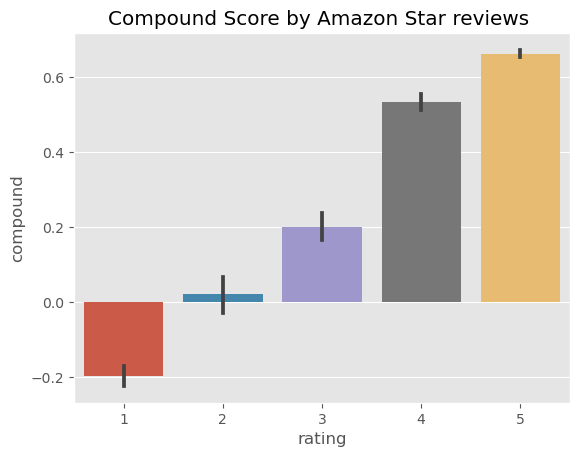

In [97]:
ax= sns.barplot(data=vaders, x='rating',y='compound' )
ax.set_title('Compound Score by Amazon Star reviews ')
plt.show()

In [55]:
## Now let's use Roberta Pretrained Model
# Use a model trained of a large corpus of data
# Transformer model accounts for the words but also the context related to other words.
!pip install transformers

In [87]:
#This is using RoBERTa model but it can handle small text
from transformers import AutoTokenizer
#from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import TFRobertaForSequenceClassification

In [88]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
#model=TFAutoModelForSequenceClassification.from_pretrained(MODEL)
model=TFRobertaForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [89]:
#This is for handling large texts
from transformers import LongformerTokenizer
from transformers import TFLongformerForSequenceClassification
MODEL = "allenai/longformer-base-4096"
tokenizer = LongformerTokenizer.from_pretrained(MODEL)
model = TFLongformerForSequenceClassification.from_pretrained(MODEL)

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
